#  <center> <font color =  darkbrown> **W4T2 Buffalo Open Data 311**



---

---
## <center> <font color =  green>By Vipul Arora
### <center> <font color =  green>Sep 23 2023
 ### <center> <font color =  green>DSA 501 Fall 2023

# <font color =  green> Buffalo Open Data

Buffalo Open Data provides data collected by the city of Buffalo. The website is https://data.buffalony.gov/

><font color =  green>The 311 dataset

This is a dataset of 311 service requests for the City of Buffalo from July 2008 - present. 311 is a toll-free number reserved nationwide since 1997 for non-emergency calls to police and other government offices. The City of Buffalo 311 Call and Resolution Center provides citizens with fast, centralized access to city services. Register complaints, get information, and access non-emergency police services.

#  <center> 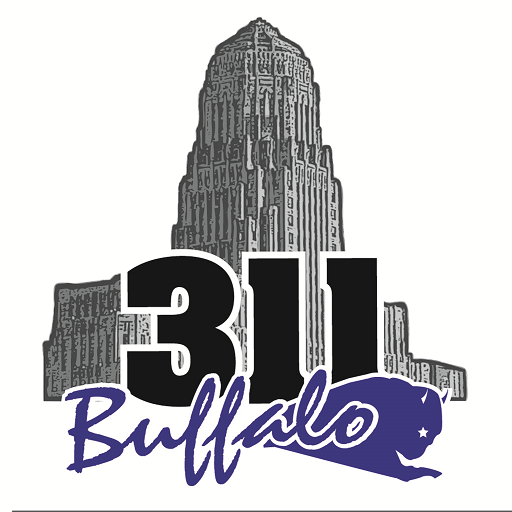

#  <center> 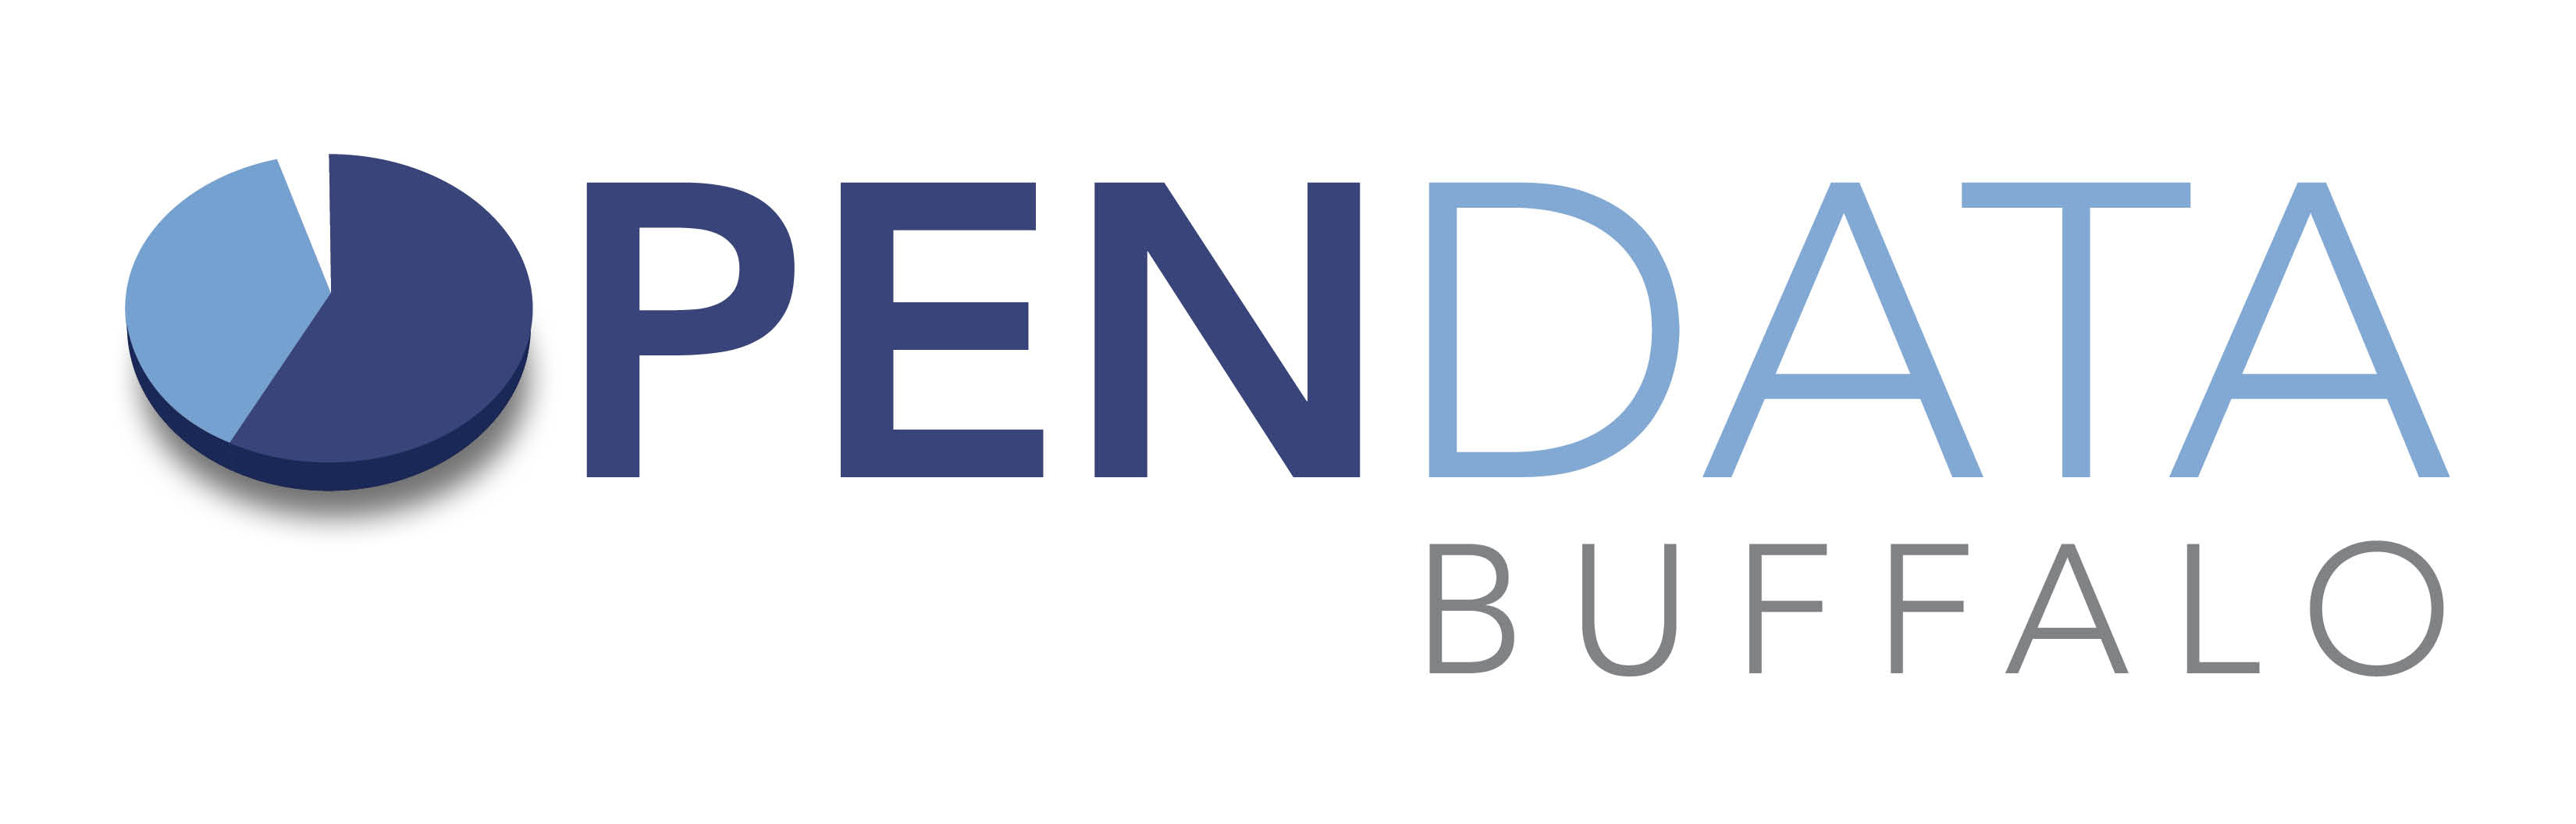

##  <font color =  green>Downloading the Buffalo Open Data The 311 dataset as alist of json data



In [ ]:
# @title
# Importing Libararies
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import urllib, json
from datetime import datetime, date, time
plt.style.use('ggplot')

In [ ]:
# @title
# importing the data from BOD of 311

url='https://data.buffalony.gov/resource/whkc-e5vr.json'
response = urllib.request.urlopen(url)
data_json = json.loads(response.read())


In [ ]:
# @title
#Lets find out the lenght of this list
len(data_json)

1000

In [ ]:
# @title
#creating a Data frame of BOD as df
df = pd.DataFrame.from_dict(pd.json_normalize(data_json), orient='columns')

# Convert date columns to datetime objects (if needed)
date_columns = ['open_date', 'closed_date']  # Replace with your date column names
for column in date_columns:
    df[column] = pd.to_datetime(df[column])


df

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_line_1,city,...,:@computed_region_h7a8_iwt4,location.latitude,location.longitude,location.human_address,address_number,property_id,x_coordinate,y_coordinate,address_line_2,:@computed_region_k9un_h6vm
0,1001805272,2023-03-09 09:49:00,2023-03-09 10:02:00,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,...,5,42.856463120634494,-78.83034407693124,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",NaN,NaN,NaN,NaN,NaN,NaN
1,1001836852,2023-04-28 08:43:00,2023-04-28 09:23:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,...,4,42.89950364149294,-78.86091335961936,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",225,100.80-5-39,-8778757.159,5296688.8027,NaN,NaN
2,1001788769,2023-02-07 15:04:00,2023-02-14 10:35:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,...,2,42.89583412887019,-78.8247421339197,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",1358,112.23-12-13,-8774730.591,5296131.1923,NaN,NaN
3,517692-1001826833,2023-04-27 20:00:00,2023-05-12 08:26:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,JEWETT PKWY,Buffalo,...,1,42.935308748564275,-78.84544637134721,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",40,89.43-5-3,-78.84544,42.93539,NaN,NaN
4,1001805334,2023-03-09 11:11:00,2023-03-13 17:33:00,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,...,8,42.91232235456432,-78.83024971030892,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",940,101.38-1-16,-8775343.69,5298636.9605,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1001811195,2023-04-05 14:33:00,2023-04-13 16:33:00,Closed,Dept of Law,Freedom of Information,FOIL Records EDPIS (Req_Serv),Unknown,Unknown,Buffalo,...,NaN,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,Unknown,NaN
996,1001807023,2023-03-20 11:30:00,2023-03-21 06:00:00,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,NORTH ST,Buffalo,...,2,42.90204617530995,-78.87612934043814,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",186,100.69-5-4.13,-8780450.997,5297075.1792,NaN,1
997,1001867114,2023-06-01 21:27:00,2023-06-06 09:54:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,CONNECTICUT,Buffalo,...,6,42.90829975956155,-78.88342345953093,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",490,99.60-5-10,-8781262.975,5298025.5732,NaN,NaN
998,1001825891,2023-04-25 09:12:00,2023-05-18 13:42:00,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,Kimberly Ave,Buffalo,...,9,42.838112137331166,-78.81239307659277,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",INTERSECTION,4332,1086855.5,1034159.3,Hancock Ave,NaN


 # <font color =  green> Data Cleaning :

## 1 Check for Missing Values

In [ ]:
# @title
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
columns_with_missing_values = missing_values[missing_values > 0]
print("Following are the Columns with missing values:")
print(columns_with_missing_values)

Following are the Columns with missing values:
closed_date                     31
address_line_1                   2
latitude                        29
longitude                       29
:@computed_region_fk4y_hpmh     32
:@computed_region_kwzn_pe6v     29
:@computed_region_uh5x_q5mi     32
:@computed_region_dwzh_dtk5     31
:@computed_region_tmcg_v66k     31
:@computed_region_xbxg_7ifr     30
:@computed_region_eziv_p4ck     31
:@computed_region_jdfw_hhbp     31
:@computed_region_urdz_b6n8     29
:@computed_region_vsen_jbmg     30
:@computed_region_nmyf_6jtp     30
:@computed_region_ff6v_jbaa     31
:@computed_region_gkva_sjqs     31
:@computed_region_h7a8_iwt4     31
location.latitude               29
location.longitude              29
location.human_address          29
address_number                  47
property_id                     47
x_coordinate                    70
y_coordinate                    70
address_line_2                 893
:@computed_region_k9un_h6vm    949
dtype: i

Check for Duplicate Entries

In [ ]:
# @title
# Check for duplicate rows in the dataset
duplicates = df[df.duplicated(keep='first')]

# Display the duplicate rows
if not duplicates.empty:
    print("Duplicate rows:")
    print(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
# @title
# Convert the 'Open_Date' column to datetime
df['open_date'] = pd.to_datetime(df['open_date'])

# Extract year, month, and week
df['Year'] = df['open_date'].dt.year
df['Month'] = df['open_date'].dt.month
df['Week'] = df['open_date'].dt.isocalendar().week

# Display the DataFrame with new columns
df

,case_reference,open_date,closed_date,status,subject,reason,type,object_type,address_line_1,city,...,location.human_address,address_number,property_id,x_coordinate,y_coordinate,address_line_2,:@computed_region_k9un_h6vm,Year,Month,Week
0,1001805272,2023-03-09 09:49:00,2023-03-09 10:02:00,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",NaN,NaN,NaN,NaN,NaN,NaN,2023,3,10
1,1001836852,2023-04-28 08:43:00,2023-04-28 09:23:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",225,100.80-5-39,-8778757.159,5296688.8027,NaN,NaN,2023,4,17
2,1001788769,2023-02-07 15:04:00,2023-02-14 10:35:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",1358,112.23-12-13,-8774730.591,5296131.1923,NaN,NaN,2023,2,6
3,517692-1001826833,2023-04-27 20:00:00,2023-05-12 08:26:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,JEWETT PKWY,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",40,89.43-5-3,-78.84544,42.93539,NaN,NaN,2023,4,17
4,1001805334,2023-03-09 11:11:00,2023-03-13 17:33:00,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",940,101.38-1-16,-8775343.69,5298636.9605,NaN,NaN,2023,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1001811195,2023-04-05 14:33:00,2023-04-13 16:33:00,Closed,Dept of Law,Freedom of Information,FOIL Records EDPIS (Req_Serv),Unknown,Unknown,Buffalo,...,NaN,Unknown,Unknown,NaN,NaN,Unknown,NaN,2023,4,14
996,1001807023,2023-03-20 11:30:00,2023-03-21 06:00:00,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,NORTH ST,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",186,100.69-5-4.13,-8780450.997,5297075.1792,NaN,1,2023,3,12
997,1001867114,2023-06-01 21:27:00,2023-06-06 09:54:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,CONNECTICUT,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",490,99.60-5-10,-8781262.975,5298025.5732,NaN,NaN,2023,6,22
998,1001825891,2023-04-25 09:12:00,2023-05-18 13:42:00,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,Kimberly Ave,Buffalo,...,"{""address"": """", ""city"": """", ""state"": """", ""zip""...",INTERSECTION,4332,1086855.5,1034159.3,Hancock Ave,NaN,2023,4,17


Copying df to new data frame bod_uncleaned

In [ ]:
# Create a copy of the original DataFrame df and store it in bod
bod_uncleaned = df.copy()

In [ ]:
df=df.drop(['case_reference', 'closed_date','property_id', ':@computed_region_fk4y_hpmh',':@computed_region_kwzn_pe6v',
            ':@computed_region_uh5x_q5mi',':@computed_region_dwzh_dtk5',':@computed_region_tmcg_v66k',':@computed_region_xbxg_7ifr',':@computed_region_eziv_p4ck',
            ':@computed_region_jdfw_hhbp',':@computed_region_urdz_b6n8',':@computed_region_vsen_jbmg',':@computed_region_nmyf_6jtp',':@computed_region_ff6v_jbaa',
            ':@computed_region_gkva_sjqs',':@computed_region_h7a8_iwt4' ,'address_line_2',':@computed_region_k9un_h6vm','census_tract','census_block_group',
            'census_block','census_tract_2010','census_block_group_2010','census_block_2010','tractce20','geoid20_tract','geoid20_blockgroup','geoid20_block',
            'location.human_address','location.latitude','location.longitude'],axis=1)

In [ ]:
# @title
df

,open_date,status,subject,reason,type,object_type,address_line_1,city,state,zip_code,...,longitude,council_district,police_district,neighborhood,address_number,x_coordinate,y_coordinate,Year,Month,Week
0,2023-03-09 09:49:00,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,NEW YORK,14220,...,-78.83034407693124,LOVEJOY,District A,Hopkins-Tifft,NaN,NaN,NaN,2023,3,10
1,2023-04-28 08:43:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,NEW YORK,14204,...,-78.86091335961936,ELLICOTT,District B,Fruit Belt,225,-8778757.159,5296688.8027,2023,4,17
2,2023-02-07 15:04:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,NEW YORK,14212,...,-78.8247421339197,FILLMORE,District C,Genesee-Moselle,1358,-8774730.591,5296131.1923,2023,2,6
3,2023-04-27 20:00:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,JEWETT PKWY,Buffalo,NEW YORK,14214,...,-78.84544637134721,DELAWARE,District D,Parkside,40,-78.84544,42.93539,2023,4,17
4,2023-03-09 11:11:00,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,NEW YORK,14211,...,-78.83024971030892,MASTEN,District C,MLK Park,940,-8775343.69,5298636.9605,2023,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-04-05 14:33:00,Closed,Dept of Law,Freedom of Information,FOIL Records EDPIS (Req_Serv),Unknown,Unknown,Buffalo,NEW YORK,UNKNOWN,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,NaN,NaN,2023,4,14
996,2023-03-20 11:30:00,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,NORTH ST,Buffalo,NEW YORK,14201,...,-78.87612934043814,FILLMORE,District B,Allentown,186,-8780450.997,5297075.1792,2023,3,12
997,2023-06-01 21:27:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,CONNECTICUT,Buffalo,NEW YORK,14213,...,-78.88342345953093,NIAGARA,District B,Elmwood Bryant,490,-8781262.975,5298025.5732,2023,6,22
998,2023-04-25 09:12:00,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,Kimberly Ave,Buffalo,NEW YORK,14220,...,-78.81239307659277,SOUTH,District A,South Park,INTERSECTION,1086855.5,1034159.3,2023,4,17


In [ ]:
# @title
# Finding the mode of the "address_line_1" column
mode_long = df['address_line_1'].mode()

# Print the mode
print("Mode of the 'address_line_1' column:", mode_long[0])

Mode of the 'address_line_1' column: Unknown


In [ ]:
# @title
#filling the nulll value to the mode value
df['address_line_1'].fillna('Unknown', inplace=True)

In [ ]:
# @title
# Finding the mode of the "longitude" column
mode_long = df['longitude'].mode()

# Print the mode
print("Mode of the 'logitude' column:", mode_long[0])

Mode of the 'logitude' column: -78.83034407693124


In [ ]:
# @title
#filling the nulll value to the mode value
df['longitude'].fillna(-78.83034407693124, inplace=True)

In [ ]:
# @title
# Finding the mode of the "latitude" column
mode_lati = df['latitude'].mode()

# Print the mode
print("Mode of the 'logitude' column:", mode_lati[0])

Mode of the 'logitude' column: 42.856463120634494


In [ ]:
# @title
#filling the nulll value to the mode value
df['latitude'].fillna(42.856463120634494, inplace=True)

In [ ]:
# @title
# Finding the mode of the "address_number" column
mode_lati = df['address_number'].mode()

# Print the mode
print("Mode of the 'address_number' column:", mode_lati[0])

Mode of the 'address_number' column: INTERSECTION


In [ ]:
# @title
#filling the nulll value to the mode value
df['address_number'].fillna('INTERSECTION', inplace=True)

In [ ]:
# @title
# Finding the mode of the "x_coordinate" column
mode_lati = df['x_coordinate'].mode()

# Print the mode
print("Mode of the 'x_coordinate' column:", mode_lati[0])

Mode of the 'x_coordinate' column: -8780804.337


In [ ]:
# @title
#filling the nulll value to the mode value
df['x_coordinate'].fillna(-8780804.337, inplace=True)

In [ ]:
# @title
# Finding the mode of the "y_coordinate" column
mode_lati = df['y_coordinate'].mode()

# Print the mode
print("Mode of the 'y_coordinate' column:", mode_lati[0])

Mode of the 'y_coordinate' column: 5294730.0418


In [ ]:
# @title
#filling the nulll value to the mode value
df['y_coordinate'].fillna(5294730.0418, inplace=True)

In [ ]:
# @title
fig = px.scatter_geo(
    data_frame=df,
    lat='latitude',
    lon='longitude',
    hover_name='type',
    color='status',
    title='Geographical Plot of Data',
    center=dict(lat=42.856463120634494, lon=-78.83034407693124),
)

In [ ]:
# @title
fig.update_geos(
    projection_type='mercator',  # You can choose different map projections
    showcoastlines=True,  # Show coastlines on the map
)

fig.update_layout(
    title_text='Geographical Plot of Data',
    geo=dict(
        showland= False,  # Show land masses on the map
    ),
)

# You can customize the color scale:
# fig.update_traces(marker=dict(size=10, opacity=0.8))

In [ ]:
# @title
# Convert the 'Open_Date' column to datetime
df['open_date'] = pd.to_datetime(df['open_date'])

# Extract year, month, and week
df['Year'] = df['open_date'].dt.year
df['Month'] = df['open_date'].dt.month
df['Week'] = df['open_date'].dt.isocalendar().week

# Display the DataFrame with new columns
df

,open_date,status,subject,reason,type,object_type,address_line_1,city,state,zip_code,...,longitude,council_district,police_district,neighborhood,address_number,x_coordinate,y_coordinate,Year,Month,Week
0,2023-03-09 09:49:00,Closed,Dept of Public Works,Engineering - Street Repairs,Paving (Req_Serv),Street,KIRKPATRICK,Buffalo,NEW YORK,14220,...,-78.83034407693124,LOVEJOY,District A,Hopkins-Tifft,INTERSECTION,-8780804.337,5294730.0418,2023,3,10
1,2023-04-28 08:43:00,Closed,Dept of Parking,Parking Violations Bureau,Parking Issues (Req_Serv),Property,MULBERRY,Buffalo,NEW YORK,14204,...,-78.86091335961936,ELLICOTT,District B,Fruit Belt,225,-8778757.159,5296688.8027,2023,4,17
2,2023-02-07 15:04:00,Closed,Dept of Public Works,Sanitation,Totes Replace (Req_Serv),Property,BROADWAY,Buffalo,NEW YORK,14212,...,-78.8247421339197,FILLMORE,District C,Genesee-Moselle,1358,-8774730.591,5296131.1923,2023,2,6
3,2023-04-27 20:00:00,Closed,Dept of Public Works,Sanitation,Recycling Missed Pick Up (Req_Serv),Property,JEWETT PKWY,Buffalo,NEW YORK,14214,...,-78.84544637134721,DELAWARE,District D,Parkside,40,-78.84544,42.93539,2023,4,17
4,2023-03-09 11:11:00,Closed,Office of the Mayor,Citizen Services - Quick Response Teams,QRT Other Issue (Req_Serv),Property,GLENWOOD,Buffalo,NEW YORK,14211,...,-78.83024971030892,MASTEN,District C,MLK Park,940,-8775343.69,5298636.9605,2023,3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-04-05 14:33:00,Closed,Dept of Law,Freedom of Information,FOIL Records EDPIS (Req_Serv),Unknown,Unknown,Buffalo,NEW YORK,UNKNOWN,...,-78.830344,UNKNOWN,UNKNOWN,UNKNOWN,Unknown,-8780804.337,5294730.0418,2023,4,14
996,2023-03-20 11:30:00,Closed,Dept of Public Works,Engineering - Street Repairs,Pot Hole (Req_Serv),Property,NORTH ST,Buffalo,NEW YORK,14201,...,-78.87612934043814,FILLMORE,District B,Allentown,186,-8780450.997,5297075.1792,2023,3,12
997,2023-06-01 21:27:00,Closed,Buffalo Police Department,Police,Police Issue (Req_Serv),Property,CONNECTICUT,Buffalo,NEW YORK,14213,...,-78.88342345953093,NIAGARA,District B,Elmwood Bryant,490,-8781262.975,5298025.5732,2023,6,22
998,2023-04-25 09:12:00,Closed,Dept of Public Works,Engineering - Traffic,Sign Hazards (Req_Serv),Property,Kimberly Ave,Buffalo,NEW YORK,14220,...,-78.81239307659277,SOUTH,District A,South Park,INTERSECTION,1086855.5,1034159.3,2023,4,17


In [ ]:
# @title

df['case']=1
df_SUBJECT = df.pivot_table(index='council_district',
                                  values='type',
                                  columns='subject',
                                  aggfunc='count')
df_REASON = df.pivot_table(index='council_district',
                                  values='type',
                                  columns='reason',
                                  aggfunc='count')

df_SUBJECT2 = df.pivot_table(index='council_district',
                                  values='type',
                                  columns=['subject','reason'],
                                  aggfunc='count')

df_OBJECT = df.pivot_table(index='council_district',
                                  values='type',
                                  columns=['object_type'],
                                  aggfunc='count')

df_neighbor = df.pivot_table(index='council_district',
                                  values='type',
                                  columns=['neighborhood'],
                                  aggfunc='count')

Create plot for 311 Type SUBJECT.

In [ ]:
# @title
# Compute subject_total
subject_total = df['subject'].value_counts().reset_index()
subject_total.columns = ['subject', 'count']

# Create a bar plot using Plotly Express
fig = px.bar(
    subject_total,
    x='subject',
    y='count',
    labels={'subject': 'Subject', 'count': 'Count'},
    title='Subject Distribution',
)

# Show the plot
fig.show()

In [ ]:
# @title
top_complaint_types = df['type'].value_counts().head()
fig = px.bar(top_complaint_types, x=top_complaint_types.index, y=top_complaint_types.values)

fig.update_xaxes(tickangle=90)
fig.update_xaxes(title_text="Complaint Type")
fig.update_yaxes(title_text="Count")
fig.update_layout(title="Top Complaint Types")

# Calculate the percentage and add it as text on top of the bars
percentage_values = (top_complaint_types / top_complaint_types.sum()) * 100
percentage_text = [f'{val:.2f}%' for val in percentage_values]

fig.update_traces(text=percentage_text, textposition='outside')

fig.show()

In [ ]:
# @title
location_type_counts = df['object_type'].value_counts().reset_index()
location_type_counts.columns = ['object_type', 'Count']

location_type_counts['Percentage'] = (location_type_counts['Count'] / location_type_counts['Count'].sum()) * 100

# Created a pie chart using Plotly Express
fig = px.pie(location_type_counts, names='object_type', values='Percentage')

fig.update_layout(title="Object Type Distribution")

fig.show()

In [ ]:
# @title
top_complaint_reason = df['reason'].value_counts().head()

# Group the data by 'Complaint Reason' and 'Status' and count occurrences
grouped_data = df.groupby(['reason', 'status']).size().reset_index(name='count')

# Filter only the top complaint reasons
filtered_data = grouped_data[grouped_data['reason'].isin(top_complaint_reason.index)]

# Create a bar plot using Plotly Express
fig = px.bar(filtered_data, x='reason', y='count', color='status',
             title='Top Complaint Reasons by Status')

# Customize the x-axis labels rotation
fig.update_xaxes(tickangle=45)

# Update the x-axis label
fig.update_xaxes(title_text="Complaint Reason")

# Update the y-axis label
fig.update_yaxes(title_text="Count")

# Show the plot
fig.show()

In [ ]:
# @title
fig = px.pie(
    top_complaint_reason,
    values=top_complaint_reason.values,
    names=top_complaint_reason.index,
    title="Top Complaint Reasons",
    labels={'names': 'Complaint Reason', 'values': 'Count'}
)

# Calculate the percentage and add it to the hover information
percentage_values = (top_complaint_reason / top_complaint_reason.sum()) * 100
percentage_text = [f'{val:.2f}%' for val in percentage_values]

fig.update_traces(hoverinfo='label+percent', textinfo='percent+label', text=percentage_text)

fig.show()

In [ ]:
# @title
import plotly.express as px

# Set the index to 'open_date' and sort the DataFrame
temp = bod_uncleaned.set_index('open_date').sort_index()

# Resample the data by week and count the occurrences
temp = temp.resample('W').count().reset_index()

# Create a line chart
fig = px.line(temp, x='open_date', y='case_reference')


fig.update_layout(
    title='Trend of 311 calls (By Week)',
    xaxis_title='Date',
    yaxis_title='Number of Calls'
)

# Show the plot
fig.show()

In [ ]:
# @title
# Get the counts of requests by month
temp = df['Month'].value_counts().reset_index()
temp.columns = ['Month', 'Count']
temp.sort_values(by='Count', inplace=True)

# Define a dictionary to map month numbers to month names
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

# Replace month numbers with month names
temp['Month'] = temp['Month'].map(month_names)

# Create a scatter plot
fig = px.scatter(temp, x='Month', y='Count', size='Count', color='Count')

# Customize the layout
fig.update_layout(
    title='Requests by Months',
    xaxis_title='Month',
    yaxis_title='Count',
)

# Show the plot
fig.show()

In [ ]:
# @title
# Get the counts of request types
temp = bod_uncleaned['type'].value_counts().reset_index()
top_types = temp.head(20)['index'].tolist()

# Filter the DataFrame to include only the top 20 request types
df1 = df[df['type'].isin(top_types)]

# Group the data by month and request type and count the number of requests
df1 = bod_uncleaned.groupby(by=['Month', 'type'])['case_reference'].count().unstack().reset_index()

# Reshape the DataFrame for plotting
vars_list = list(df1.columns)[1:]
df1 = pd.melt(df1, id_vars='Month', value_vars=vars_list)
df1.columns = ['Month', 'case_reference', 'type']

# Create a scatter plot
fig = px.scatter(df1, x='type', y='case_reference', color='Month')

# Customize the layout
fig.update_layout(
    title='Distribution of Requests for Top 20 Most Reported Request Typess',
    xaxis_title='Request Type',
    yaxis_title='Requests',
)

# Show the plot
fig.show()






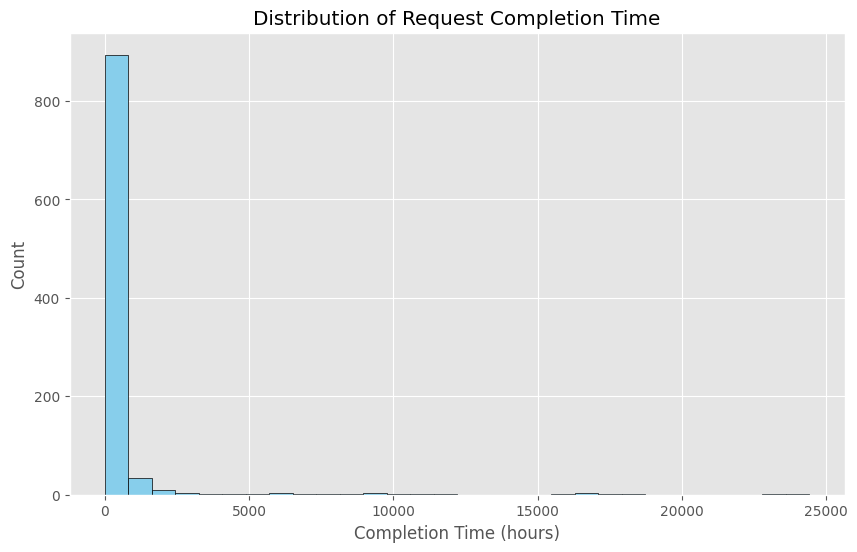

In [ ]:
# @title
bod_uncleaned['open_date'] = pd.to_datetime(bod_uncleaned['open_date'])
bod_uncleaned['closed_date'] = pd.to_datetime(bod_uncleaned['closed_date'])

# Calculate the time difference in hours between closed and open dates
bod_uncleaned['completion_time_hours'] = (bod_uncleaned['closed_date'] - bod_uncleaned['open_date']).dt.total_seconds() / 3600

# Create a histogram to visualize the completion time distribution
plt.figure(figsize=(10, 6))
plt.hist(bod_uncleaned['completion_time_hours'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Completion Time (hours)')
plt.ylabel('Count')
plt.title('Distribution of Request Completion Time')
plt.grid(True)
plt.show()